In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
X = data.iloc[:,0:-1].values
y = data.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 4)

In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [6]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'rbf', random_state = 4)
model_SVC.fit(X_train, y_train)

y_pred_svm = model_SVC.decision_function(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

y_pred_logistic = model_logistic.decision_function(X_test)

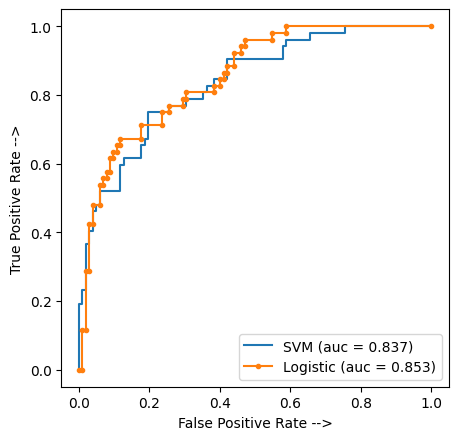

In [8]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, logistic_threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (auc = %0.3f)' % auc_svm)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [9]:
import pandas as pd
i = np.arange(len(logistic_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(logistic_tpr-(1-logistic_fpr), index=i), 'thresholds' : pd.Series(logistic_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal logistic threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal logistic threshold is:  27   -0.703471
Name: thresholds, dtype: float64


In [10]:
i = np.arange(len(svm_tpr)) 
roc = pd.DataFrame({'tf' : pd.Series(svm_tpr-(1-svm_fpr), index=i), 'thresholds' : pd.Series(svm_threshold, index=i)})
ideal_roc_thresh = roc.iloc[(roc.tf-0).abs().argsort()[:1]]  #Locate the point where the value is close to 0
print("Ideal SVM threshold is: ", ideal_roc_thresh['thresholds']) 

Ideal SVM threshold is:  25   -0.418445
Name: thresholds, dtype: float64


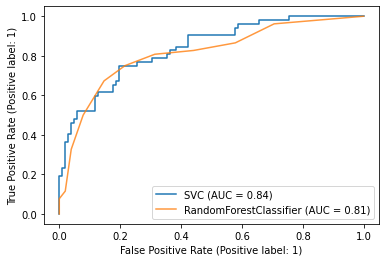

In [11]:
from sklearn.metrics import RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)

svc_disp = RocCurveDisplay.from_estimator(model_SVC, X_test, y_test)
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=ax, alpha=0.8)
plt.show()

In [12]:
i = np.arange(len(svm_tpr)) # index for df
roc = pd.DataFrame({'fpr' : pd.Series(svm_fpr, index=i),'tpr' : pd.Series(svm_tpr, index = i), '1-fpr' : pd.Series(1-svm_fpr, index = i), 'tf' : pd.Series(svm_tpr - (1-svm_fpr), index = i), 'thresholds' : pd.Series(svm_threshold, index = i)})
roc.iloc[(roc.tf-0).abs().argsort()[:1]]

,fpr,tpr,1-fpr,tf,thresholds
25,0.254902,0.75,0.745098,0.004902,-0.418445


In [13]:
optimal_idx = np.argmax(svm_tpr - svm_fpr)
optimal_threshold = svm_threshold[optimal_idx]
print(optimal_threshold)

-0.19841213329281296


In [14]:
optimal_idx = np.argmax(logistic_tpr - logistic_fpr)
optimal_threshold = logistic_threshold[optimal_idx]
print(optimal_threshold)

0.0019232709837272433


In [15]:
from numpy import sqrt
from numpy import argmax
# calculate the g-mean for each threshold
gmeans = sqrt(svm_tpr * (1-svm_fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (svm_threshold[ix], gmeans[ix]))

Best Threshold=-0.198412, G-Mean=0.776


In [16]:
# get the best threshold
J = svm_tpr - svm_fpr
ix = argmax(J)
best_thresh = svm_threshold[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=-0.198412


In [17]:
# calculate the g-mean for each threshold
gmeans = sqrt(logistic_tpr * (1-logistic_fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (logistic_threshold[ix], gmeans[ix]))

Best Threshold=0.001923, G-Mean=0.771
